# Netflix Stock Price Trend Analysis Project
### Author github.com/tushar2704

### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('./archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [20]:
# Read the CSV file containing the 5-year historical Netflix stock data
df = pd.read_csv(r"D:\Stock-Market-Trend-Analysis\src\data\netflix_stock_5y.csv")


In [21]:
df.head(11)

Date        Open        High         Low       Close   
0   2018-08-13 00:00:00-04:00  339.890015  347.190002  339.070007  341.309998  \
1   2018-08-14 00:00:00-04:00  342.089996  342.410004  336.250000  337.489990   
2   2018-08-15 00:00:00-04:00  334.029999  335.500000  321.000000  326.399994   
3   2018-08-16 00:00:00-04:00  329.899994  331.170013  321.209991  322.440002   
4   2018-08-17 00:00:00-04:00  319.010010  324.369995  312.959991  316.779999   
5   2018-08-20 00:00:00-04:00  314.640015  331.600006  310.929993  327.730011   
6   2018-08-21 00:00:00-04:00  331.000000  341.500000  329.700012  338.019989   
7   2018-08-22 00:00:00-04:00  338.489990  346.209991  337.410004  344.440002   
8   2018-08-23 00:00:00-04:00  348.109985  350.079987  337.649994  339.170013   
9   2018-08-24 00:00:00-04:00  346.000000  359.149994  344.540009  358.820007   
10  2018-08-27 00:00:00-04:00  367.149994  374.489990  360.000000  364.579987   

      Volume  Dividends  Stock Splits  
0    6888900        0.0           0.0  
1    5805200        0.0           0.0  
2   11784500        0.0           0.0  
3    6689700        0.0           0.0  
4   10407900        0.0           0.0  
5   13591100        0.0           0.0  
6   14783200        0.0           0.0  
7    8930700        0.0           0.0  
8   11336400        0.0           0.0  
9   14729100        0.0           0.0  
10  17427300        0.0           0.0

In [22]:
# Create a copy of the DataFrame for visualization purposes
viz = df.copy()

In [23]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [20016 lines of output]
      C:\Users\tusha\AppData\Local\Temp\pip-install-12r4z613\pystan_f0f471ecf7724225b1051227bc4004c1\setup.py:235: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command import install
      Compiling pystan/_api.pyx because it changed.
      Compiling pystan/_chains.pyx because it changed.
      Compiling pystan/_misc.pyx because it changed.
      [1/3] Cythonizing pystan/_api.pyx
      [2/3] Cythonizing pystan/_chains

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
  Running setup.py install for pystan: started
  Running setup.py install for pystan: finished with status 'error'


# Data Preparation

In [24]:
# Check for missing values in each column of the DataFrame 'df'
missing_values = df.isnull().sum()
print("Missing values in each column:\n{}".format(missing_values))


Missing values in each column:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [8]:
# Display information about the DataFrame 'df'
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   float64
 7   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB
None


In [8]:
# Display summary statistics for each column using the describe() function
summary_stats = df.describe().T

# Print the summary statistics
print(summary_stats)


               count          mean           std           min           25%  \
Open          1258.0  3.934718e+02  1.171758e+02  1.639600e+02  3.098125e+02   
High          1258.0  3.997219e+02  1.178263e+02  1.720600e+02  3.156100e+02   
Low           1258.0  3.870284e+02  1.161198e+02  1.627100e+02  3.042975e+02   
Close         1258.0  3.935017e+02  1.168975e+02  1.663700e+02  3.105150e+02   
Volume        1258.0  7.755346e+06  6.581512e+06  1.144000e+06  4.326000e+06   
Dividends     1258.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Stock Splits  1258.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                       50%           75%           max  
Open          3.655750e+02  4.950000e+02  6.923500e+02  
High          3.712000e+02  5.029925e+02  7.009900e+02  
Low           3.602200e+02  4.877750e+02  6.860900e+02  
Close         3.659450e+02  4.945575e+02  6.916900e+02  
Volume        6.078350e+06  9.104225e+06  1.333875e+08  
Dividends     0.0

## Splitting into Training and Test sets

In [ ]:
train, test = train_test_split(df, test_size = 0.2)

In [ ]:
test_pred = test.copy()

In [ ]:
train.head(10)

Date        Open        High         Low       Close   Adj Close  \
864  2021-07-13  535.760010  545.330017  535.760010  540.679993  540.679993   
135  2018-08-17  319.010010  324.369995  312.959991  316.779999  316.779999   
309  2019-04-30  369.559998  374.500000  368.350006  370.540009  370.540009   
265  2019-02-26  362.980011  365.700012  359.329987  364.970001  364.970001   
984  2021-12-31  610.010010  614.080017  602.049988  602.440002  602.440002   
792  2021-03-30  510.510010  514.409973  506.910004  513.390015  513.390015   
570  2020-05-12  442.000000  444.170013  431.359985  431.820007  431.820007   
178  2018-10-18  360.670013  362.200012  346.049988  346.709991  346.709991   
710  2020-11-30  490.079987  492.549988  481.269989  490.700012  490.700012   
233  2019-01-09  317.709991  323.350006  313.500000  319.959991  319.959991   

       Volume  
864   2751600  
135  10407900  
309   3870100  
265   4944600  
984   1995900  
792   2418100  
570   4598200  
178  18461000  
710   3530900  
233  13343200

In [ ]:
test.head(10)

Date        Open        High         Low       Close   Adj Close  \
562   2020-04-30  410.309998  424.440002  408.000000  419.850006  419.850006   
290   2019-04-02  366.250000  368.420013  362.220001  367.720001  367.720001   
514   2020-02-21  385.329987  387.320007  377.899994  380.070007  380.070007   
506   2020-02-10  365.000000  374.799988  362.519989  371.070007  371.070007   
634   2020-08-12  471.339996  482.489990  470.179993  475.470001  475.470001   
629   2020-08-05  508.679993  510.100006  501.200012  502.109985  502.109985   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   
764   2021-02-18  549.000000  550.000000  538.229980  548.219971  548.219971   
862   2021-07-09  531.000000  538.260010  528.580017  535.979980  535.979980   
220   2018-12-19  269.959991  280.869995  263.769989  266.769989  266.769989   

        Volume  
562    7954000  
290    5158700  
514    3930100  
506    5294100  
634    5439200  
629    4308200  
1008   7782400  
764    2456200  
862    2777200  
220   13788400

In [ ]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [ ]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [ ]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_lnr.predict(x_test)

In [ ]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.67051347]


# Model Evaluation

In [ ]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 15.108
RMSE 3.887
MAE 3.03
MAPE 0.007
R2 Score :  0.999


# Model Visualization

In [ ]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [ ]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [ ]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

Close
Date                  
2018-02-05  254.259995
2018-02-06  265.720001
2018-02-07  264.559998
2018-02-08  250.100006
2018-02-09  249.470001
...                ...
2022-01-31  427.140015
2022-02-01  457.130005
2022-02-02  429.480011
2022-02-03  405.600006
2022-02-04  410.170013

[1461 rows x 1 columns]

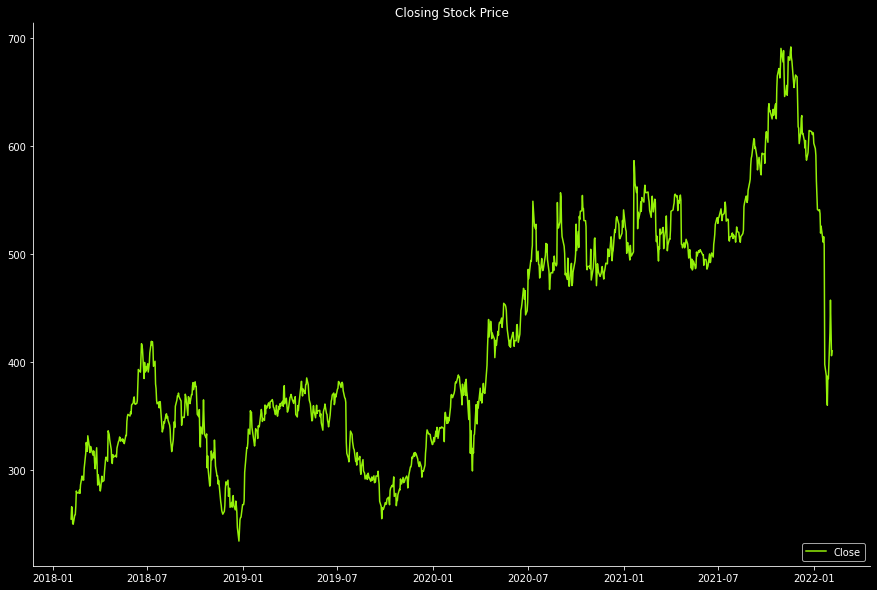

In [ ]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

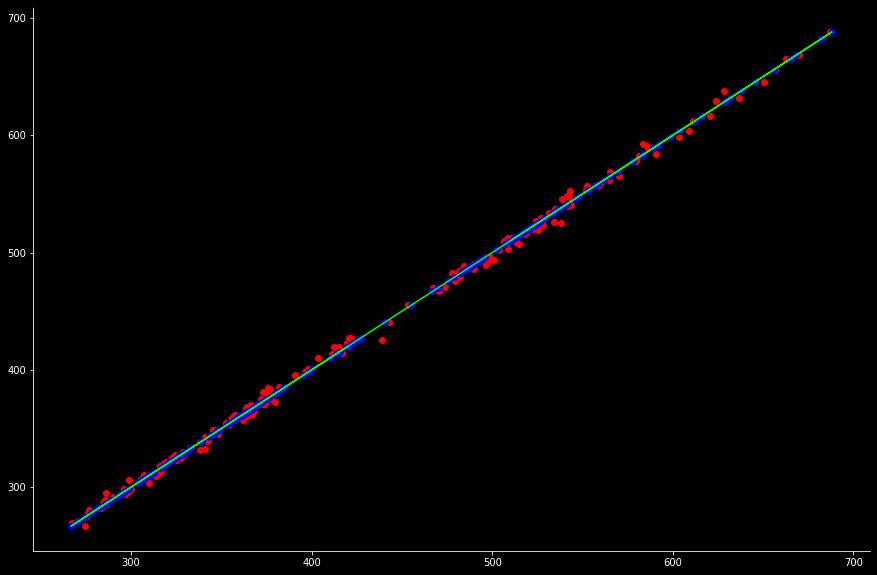

In [ ]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [ ]:
test_pred['Close_Prediction'] = y_pred
test_pred

Date        Open        High         Low       Close   Adj Close  \
562  2020-04-30  410.309998  424.440002  408.000000  419.850006  419.850006   
290  2019-04-02  366.250000  368.420013  362.220001  367.720001  367.720001   
514  2020-02-21  385.329987  387.320007  377.899994  380.070007  380.070007   
506  2020-02-10  365.000000  374.799988  362.519989  371.070007  371.070007   
634  2020-08-12  471.339996  482.489990  470.179993  475.470001  475.470001   
..          ...         ...         ...         ...         ...         ...   
286  2019-03-27  361.000000  362.470001  350.369995  353.369995  353.369995   
746  2021-01-22  582.099976  583.989990  564.349976  565.169983  565.169983   
779  2021-03-11  512.200012  530.239990  510.709991  523.059998  523.059998   
66   2018-05-10  331.500000  332.059998  327.339996  329.600006  329.600006   
810  2021-04-26  506.760010  510.480011  503.000000  510.299988  510.299988   

      Volume  Close_Prediction  
562  7954000        419.988619  
290  5158700        364.748406  
514  3930100        380.935387  
506  5294100        370.826445  
634  5439200        479.402083  
..       ...               ...  
286  7852400        353.961306  
746  7550800        570.003329  
779  4714500        525.496004  
66   5302300        328.585101  
810  4388800        506.791206  

[202 rows x 8 columns]

In [ ]:
test_pred[['Close', 'Close_Prediction']].describe().T

count        mean         std         min         25%  \
Close             202.0  426.823267  107.091927  266.769989  339.117508   
Close_Prediction  202.0  426.755601  107.426357  267.144534  341.139333   

                         50%         75%         max  
Close             384.074997  520.212494  688.289978  
Close_Prediction  380.384466  522.164269  686.981867

**Actual Close Price vs. Predicted Close Price**
<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

In [ ]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [ ]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

Close  Close_Prediction
Date                                    
2018-02-15  280.269989        276.791432
2018-02-16         NaN               NaN
2018-02-17         NaN               NaN
2018-02-18         NaN               NaN
2018-02-19         NaN               NaN
...                ...               ...
2022-01-31  427.140015        420.725448
2022-02-01         NaN               NaN
2022-02-02         NaN               NaN
2022-02-03         NaN               NaN
2022-02-04  410.170013        403.471597

[1451 rows x 2 columns]

In [ ]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em><br>
<br>    
<p style="text-align:center"><img src="https://allfreethankyounotes.com/wp-content/uploads/2021/01/all-free-thank-you-gif-3.gif" width="480" height="373"></p>

In [25]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


<Axes: >

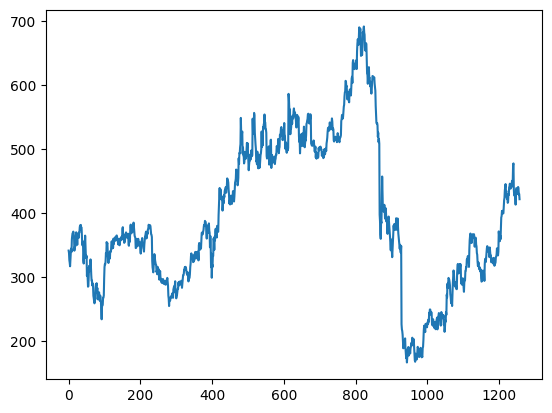

In [26]:
# Explore data distribution and trends
df['Close'].plot()

## Feature Engineering

### Create additional features like moving averages, technical indicators, etc.

In [27]:
# Calculate 50-day moving average
df['50_day_MA'] = df['Close'].rolling(window=50).mean()


In [28]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculate RSI for the entire DataFrame
df['RSI'] = calculate_rsi(df)


## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', '50_day_MA']
target = 'Close'

# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## Model Selection and Training

In [17]:
!pip install Cython
!pip install pystan==2.19.1.1
!pip install fbprophet


  Using cached Cython-3.0.0-cp311-cp311-win_amd64.whl (2.8 MB)
^C
^C


In [33]:
from statsmodels.tsa.arima.model import ARIMA


In [37]:
#from fbprophet import Prophet

#from fbprophet import Prophet

#train ARIMA model
arima_model =ARIMA(train_data[target], order=(5, 1, 1))


# Fit the ARIMA model
arima_fit = arima_model.fit()

## Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11420.608298491321


## Visualization and Prediction

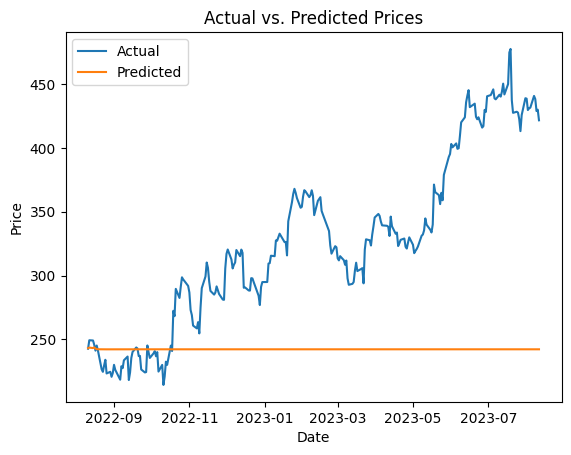

In [43]:
import matplotlib.pyplot as plt

# Visualize predictions and actual prices
plt.plot(test_data['Date'], test_data[target], label='Actual')   # Plot actual prices
plt.plot(test_data['Date'], predictions, label='Predicted')      # Plot predicted prices
plt.legend()                                                     # Show legend
plt.xlabel('Date')                                               # Set x-axis label
plt.ylabel('Price')                                              # Set y-axis label
plt.title('Actual vs. Predicted Prices')                         # Set plot title
plt.show()                                                       # Display the plot

# Use the trained model to predict future prices
# Generate a range of dates for future predictions
future_dates = pd.date_range(start=test_data['Date'].iloc[-1], periods=30, freq='D')
# Create a DataFrame to store future prediction dates
future = pd.DataFrame({'ds': future_dates})
